In [8]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import copy

In [9]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

        f.savefig("fig_out.png")

In [10]:
transform = A.Compose([
    A.GaussianBlur(blur_limit=(3, 7), sigma_limit=0, always_apply=False, p=0.5),
    A.Flip(always_apply=False, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), mean=0, per_channel=True, always_apply=False, p=0.5),
    A.RandomBrightnessContrast(always_apply=False, p=0.5),
    A.RandomShadow(shadow_roi=(0, 0.5, 0.5, 0.5), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, always_apply=False, p=0.5),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), always_apply=False, p=0.5),
    # A.Rotate(limit=15, interpolation=1, border_mode=1, value=None, mask_value=None, rotate_method='largest_box', crop_border=False, always_apply=False, p=0.5),
])

In [11]:
image = cv2.imread("multiple_rgby_01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread("multiple_rgby_01.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

False


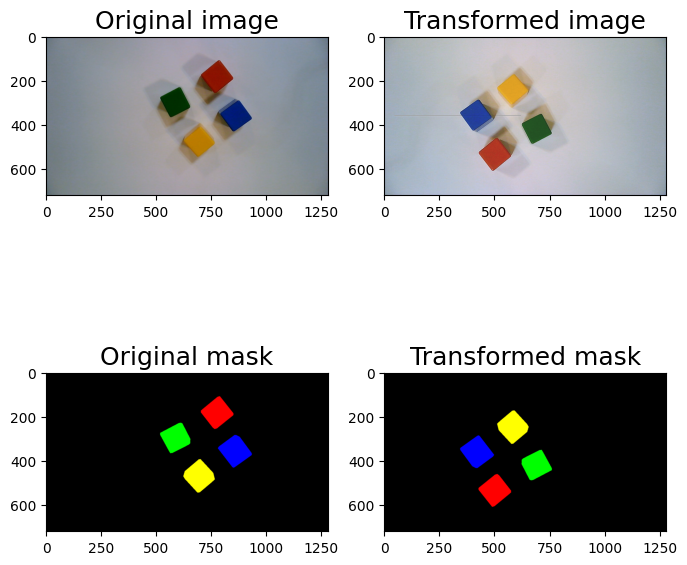

In [12]:
transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

if np.array_equal(transformed_image, image):
    print("True")
else:
    print("False")

visualize(transformed_image, transformed_mask, original_image=image, original_mask=mask)

In [13]:
default_dir = "C:/anoosheh/CP/Master/Thesis/Dataset/Dataset_under_Delta_robot_without_light_0_degree/Prepare_for_yolov8_with_augmentation"
image_dir = default_dir + "/images"
mask_dir = default_dir + "/masks"

In [14]:
cnt = 0
image_list = os.listdir(image_dir)
mask_list = os.listdir(mask_dir)

for i in range(len(image_list)):
  image_path = os.path.join(image_dir, image_list[i])
  mask_path = os.path.join(mask_dir, mask_list[i])

  image = cv2.imread(image_path)
  mask = cv2.imread(mask_path)

  transformed_image = copy.deepcopy(image)
  while np.array_equal(transformed_image, image):
    transformed = transform(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']

  cv2.imwrite(image_dir + "/" + image_list[i][:-4] + "_" + str(cnt) + ".jpg", transformed_image)
  cv2.imwrite(mask_dir + "/"+ mask_list[i][:-4] + "_" + str(cnt) + ".png", transformed_mask)
  cnt += 1
    
cv2.destroyAllWindows()